<a href="https://colab.research.google.com/github/marcinwolter/DNN_examples/blob/master/mnist_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
'''Trains a simple convnet on the MNIST dataset.

Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

!pip install keras_sequential_ascii

import matplotlib.pyplot as plt
import numpy as np

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras_sequential_ascii import sequential_model_to_ascii_printout

batch_size = 128
num_classes = 10
epochs = 20 #12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# Vizualizing model structure

sequential_model_to_ascii_printout(model)



  Created wheel for keras-sequential-ascii: filename=keras_sequential_ascii-0.1.1-cp36-none-any.whl size=3062 sha256=f2ed29925feeb5414b2bc94f64546ac67fde421a4be9e490c0bc2be19f24fd45
  Stored in directory: /root/.cache/pip/wheels/f5/8d/81/912666dff82a923ce423a7e797cd75f54271c7031512cdb282
Successfully built keras-sequential-ascii


Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####     28   28    1
              Conv2D    \|/  -------------------       320     0.0%
                relu   #####     26   26   32
              Conv2D    \|/  -------------------     18496     1.5%
                relu   #####     24   24   64
        MaxPooling2D   Y max -------------------         0     0.0%
                       #####     12   12   64
             Dropout    | || -------------------         0     0.0%
                       #####     12   12   64
             Flatten   ||||| -------------------         0     0.0%
                       #####        9216
               Dense   XXXXX -------------------   1179

In [2]:

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/20





60000/60000 [==============================] - 12s 203us/step - loss: 0.2737 - acc: 0.9157 - val_loss: 0.0602 - val_acc: 0.9808
Epoch 2/20
60000/60000 [==============================] - 6s 100us/step - loss: 0.0886 - acc: 0.9741 - val_loss: 0.0385 - val_acc: 0.9872
Epoch 3/20
60000/60000 [==============================] - 6s 102us/step - loss: 0.0665 - acc: 0.9808 - val_loss: 0.0367 - val_acc: 0.9871
Epoch 4/20
60000/60000 [==============================] - 6s 103us/step - loss: 0.0534 - acc: 0.9842 - val_loss: 0.0312 - val_acc: 0.9899
Epoch 5/20
60000/60000 [==============================] - 6s 103us/step - loss: 0.0471 - acc: 0.9864 - val_loss: 0.0313 - val_acc: 0.9900
Epoch 6/20
60000/60000 [==============================] - 6s 102us/step - loss: 0.0408 - acc: 0.9880 - val_loss: 0.0277 - val_acc: 0.9907
Epoch 7/20
60000/60

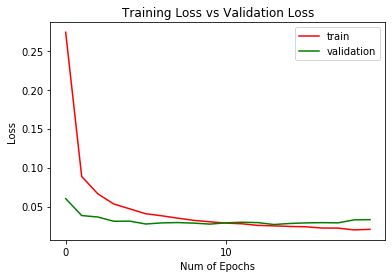

In [3]:
# Plots for training and testing process: loss and accuracy

n_epochs = len(history.history['loss'])

#plt.figure(0)
#plt.plot(history.history['categorical_accuracy'],'r')
#plt.plot(history.history['val_categorical_accuracy'],'g')
#plt.xticks(np.arange(0, n_epochs, 10.0))
#plt.rcParams['figure.figsize'] = (8, 6)
#plt.xlabel("Num of Epochs")
#plt.ylabel("Accuracy")
#plt.title("Training Cat_Accuracy vs Validation Cat_Accuracy")
#plt.legend(['train','validation'])

plt.figure(1)
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'g')
plt.xticks(np.arange(0, n_epochs, 10.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
plt.show()



In [4]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.03328939628885382
Test accuracy: 0.9906


In [5]:

# evaluate loaded model
scores_train = model.evaluate(x_train, y_train, verbose=0)
scores_test  = model.evaluate(x_test,  y_test,  verbose=0)

print("Accuracy Train: %.2f%% , Test: %.2f%% " % (scores_train[1]*100, scores_test[1]*100 ))

Accuracy Train: 99.84% , Test: 99.06% 


[[ 977    0    0    0    0    0    1    1    1    0]
 [   0 1132    1    1    0    1    0    0    0    0]
 [   1    1 1024    1    0    0    0    5    0    0]
 [   0    0    1 1004    0    4    0    0    1    0]
 [   0    0    0    0  974    0    5    0    0    3]
 [   1    0    0    4    0  886    1    0    0    0]
 [   3    2    0    1    1    3  948    0    0    0]
 [   0    2    5    1    0    0    0 1018    1    1]
 [   4    0    2    1    0    4    0    1  959    3]
 [   2    1    0    3    5    7    0    5    2  984]]


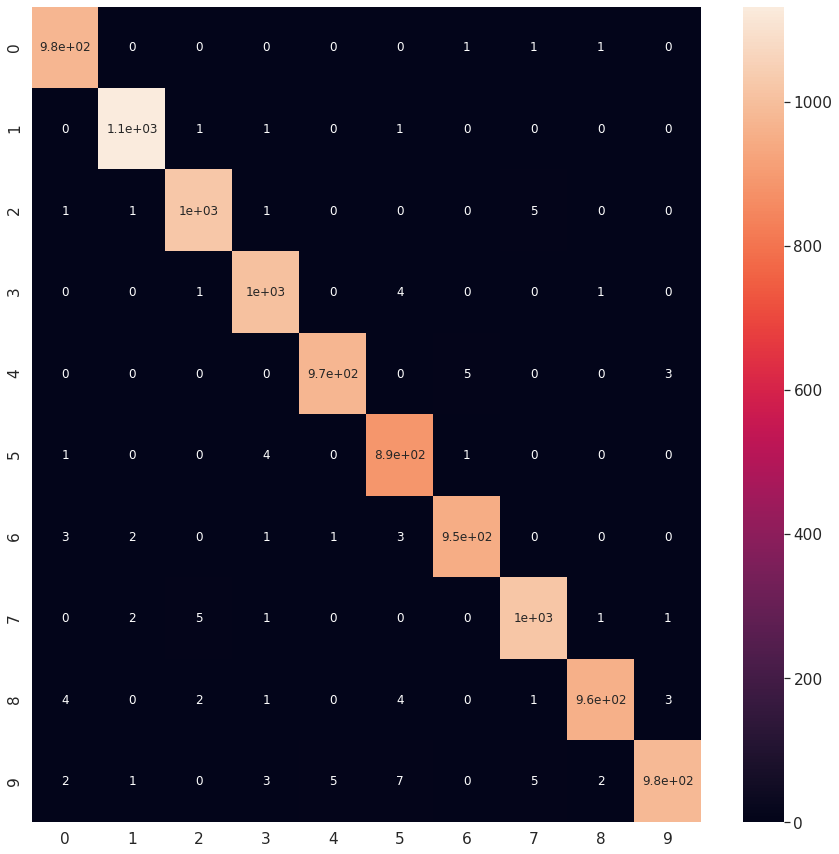

In [6]:
# Confusion matrix result

from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict(x_test, verbose=2)

y_pred = np.argmax(Y_pred, axis=1)

y_test2 = np.argmax(y_test, axis=1)



#confusion matrix
cm = confusion_matrix(np.argmax(y_test,axis=1),y_pred)
print(cm)

# Visualizing of confusion matrix
import seaborn as sn
import pandas  as pd


df_cm = pd.DataFrame(cm, range(10),range(10))
#                     range(num_classes),
#                  range(num_classes))
#plt.figure(figsize = (10,7))
plt.figure(2,figsize = (15,15) )
sn.set(font_scale=1.4) #for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12})# font size
plt.show()
